<h2 style="color:purple" align="center"> Multiple Linear Regresssion-CBC3 </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

<h3 style="color:red" align="left"> Problem Statement </h3>

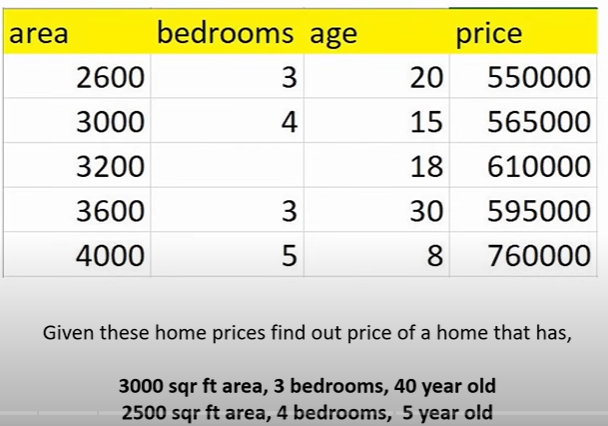

<h3 style="color:blue" align="left"> Problem Analysis </h3>

- **(1): It found that as the houses get older price tend to increase, so there is a linear pattern, negative relationship**
- **(2): Number of bedroom & area size get incresae, price tend to incresae, positive relationship**
- **(3): Multiple features corresponses to singular target, so multiple linear regression can fit**
- **(4): There is a missing values which to be handled**

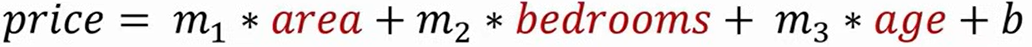

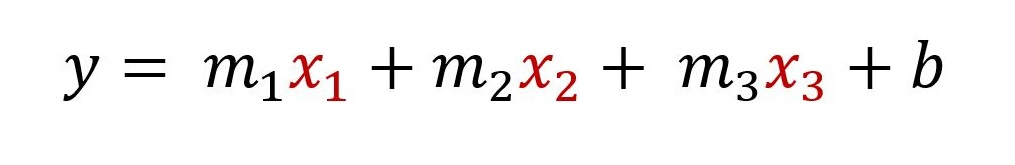

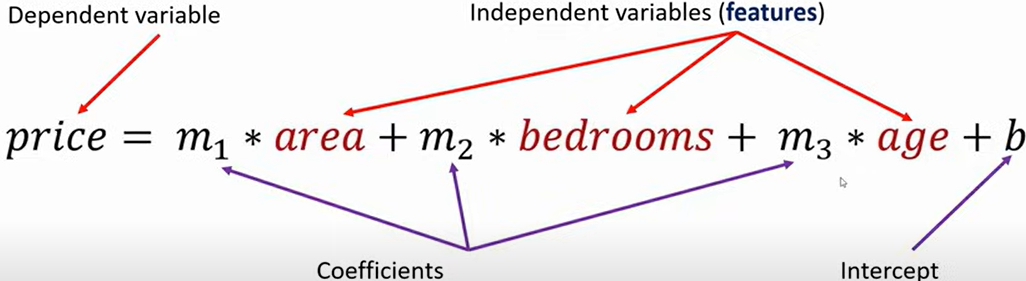

* Each features having corresponding slopes (m1, m2, m3) and Only ONE Intercept (b)
* The problem can be generalized by this equation, where it can have n number of individual variables

<h3 style="color:black" align="left"> Topic </h3>

* Missing NaN values
* Build Linear Regression model using Multiple Variables

In [2]:
df = pd.read_csv(r"E:/M60/ml_dataset/homeprices_v2.csv")
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


<h3 style="color:blue" align="left"> Missing values Handling </h3>

In [3]:
df.bedrooms.median()

4.0

In [4]:
# Floor / int values
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [5]:
# Filling missing values with median
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


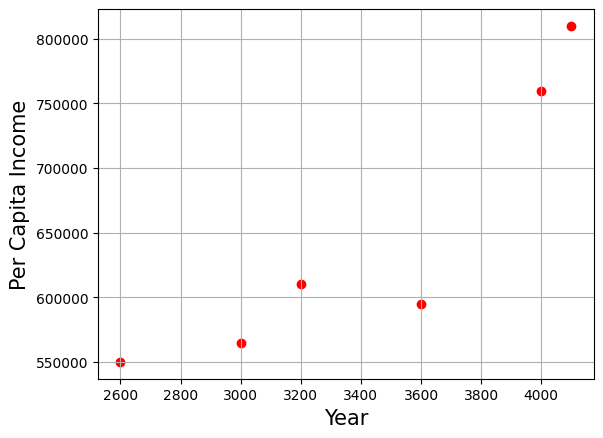

In [6]:
# relation bw year and per capita income (US$) columns of the dataset before the prediction
plt.scatter(df['area'], df['price'], color='red')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Per Capita Income', fontsize=15)
plt.grid(True)
plt.show()

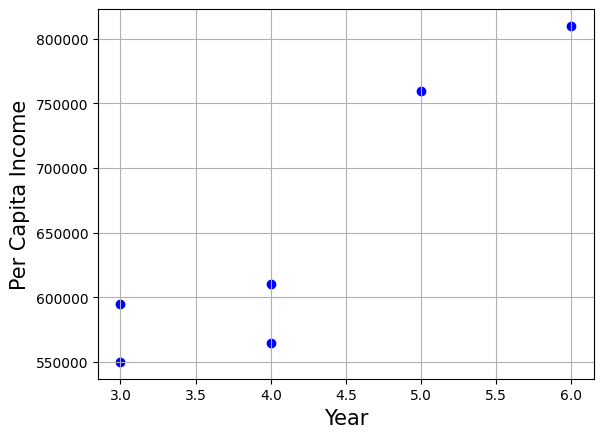

In [7]:
plt.scatter(df['bedrooms'], df['price'], color='blue')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Per Capita Income', fontsize=15)
plt.grid(True)
plt.show()

<h4 style="color:black" align="left"> Learning </h4>

**(1) Before Applying ml model, data needed to be prepossed & clean**

<h4 style="color:lightgrey" align="center"> Data Preprocessing step is over! </h4>

<h3 style="color:blue" align="left" > Build ML Model </h3>

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['area','bedrooms','age']], df.price) # model.fit(X,y)

LinearRegression()

In [9]:
# Lets check cofficient we will have 3 coef / m1, m2, m3 respectivly
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [10]:
# Intercept (Single b)
model.intercept_

221323.00186540443

<h3 style="color:green" align="left"> Prediction </h3>

In [11]:
# Predicion1: Prediction as per given condition (Area: 3000 sft, Bedrooms=3, Year=40)
model.predict([[3000, 3, 40]])  # input features in 2D, return predicted price

array([498408.25158031])

In [12]:
# Predicion2: Prediction as per given condition (Area: 2500 sft, Bedrooms=4, Year=5)
model.predict([[2500, 4, 5]])

array([578876.03748933])

In [13]:
# Prediction 3
model.predict([[2500, 4, 15]])

array([546558.858403])

<h3 style="color:blak" align="left"> Predicted Result Analysis </h3>

* In prediction 1, house 3000 sft house price is around 49K, while 2500 sfq (smaller) size house price is 57K, the reason of this is "House Old"!

#### Lets check & verify the scatch

In [14]:
# y = mx + b  (m1, m2, m3) + intercept
(112.06244194 * 3000) + (23388.88007794 * 3) + (-3231.71790863*40) + 221323.00186540443

498408.25157402444

<h3 style="color:blue" align="left"> New Input from external source </h3>

In [16]:
df_new = pd.read_csv("E:/M60/ml_dataset/homeprices_v3.csv")
df_new

,area,bedrooms,age
0,4300,3,15
1,4500,4,15
2,4400,4,18
3,4700,3,35
4,5100,5,6
5,4700,3,5


In [17]:
# price pridiction on new area by our trained model, syntax: model.predict(input)
price = model.predict(df_new)
price

array([724882.37382091, 770683.74228727, 749782.34436716, 705072.9924251 ,
       890395.54870819, 802024.52968409])

In [20]:
# lets add this output (price) with input/feature df
df_new['price'] = price
df_new

,area,bedrooms,age,price
0,4300,3,15,724882.373821
1,4500,4,15,770683.742287
2,4400,4,18,749782.344367
3,4700,3,35,705072.992425
4,5100,5,6,890395.548708
5,4700,3,5,802024.529684


<h4 style="color:red" align="center"> End </h4>